## Notebook 1 : Analyse sur la proximité des gares relié aux données foncières

## 1 - Introduction ##
Nettoyage et Affichage des données 


In [62]:
#### NETTOYAGE DES DONNÉES DE LA GARE ####
import pandas as pd

# Charger les données des gares
gares_df = pd.read_csv("liste-des-gares.csv", sep=';')

# Sélectionner les colonnes importantes
colonnes_utiles = ['LIBELLE', 'COMMUNE', 'DEPARTEMENT', 'X_WGS84', 'Y_WGS84', 'FRET', 'VOYAGEURS']
gares_df = gares_df[colonnes_utiles]

# Renommer les colonnes pour plus de clarté
gares_df.rename(columns={
    'LIBELLE': 'Nom_Gare',
    'COMMUNE': 'Commune_gare',
    'DEPARTEMENT': 'Département',
    'X_WGS84': 'Longitude',
    'Y_WGS84': 'Latitude'
}, inplace=True)

# Filtrer les gares actives 
gares_actives = gares_df[gares_df['VOYAGEURS'] == 'O']  # Garder uniquement les gares desservant des voyageurs

# Vérifier les valeurs vides et nettoyer
gares_actives = gares_actives.dropna(subset=['Longitude', 'Latitude'])

# Sauvegarder le fichier nettoyé
gares_actives.to_csv('liste-des-gares-nettoyees.csv', index=False)

gares_actives.head()

,Nom_Gare,Commune_gare,Département,Longitude,Latitude,FRET,VOYAGEURS
0,La Douzillère,JOUE-LES-TOURS,INDRE-ET-LOIRE,0.653001,47.338661,N,O
2,La Défense,PUTEAUX,HAUTS-DE-SEINE,2.238472,48.893437,N,O
3,Byans,BYANS-SUR-DOUBS,DOUBS,5.852088,47.118329,N,O
4,Chamelet,CHAMELET,RHONE,4.507016,45.981670,N,O
5,L'Hermitage-Mordelles,L'HERMITAGE,ILLE-ET-VILAINE,-1.819212,48.123336,O,O


In [63]:
#### EXPLORING VALEURS FONCIÈRES  ####

fonciere_file = "df_complete.csv"  # Nom du fichier des données foncières

df_pv = pd.read_csv(fonciere_file)  # Charger les données foncières

df_pv.head()

/var/folders/2j/m3j3kzvx7ldfkj1yxvd400vw0000gn/T/ipykernel_97907/3086571810.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pv = pd.read_csv(fonciere_file)  # Charger les données foncières


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


## 2 - Analyse des prix au m² en fonction de la proximité des gares

In [64]:
import pandas as pd

# Charger les fichiers CSV
gares_file = "liste-des-gares-nettoyees.csv"  # Nom du fichier des gares nettoyées
gares_df = pd.read_csv(gares_file)  # Charger les données des gares

# Extraction des communes avec des gares
communes_avec_gares = gares_df["Commune_gare"].unique()

# Ajouter une colonne pour indiquer si la propriété est proche d'une gare
df_pv["Proche_gare"] = df_pv["Commune"].apply(lambda x: x in communes_avec_gares)


- calculer le prix moyen au mètre carré en fonction de la proximité des gares

In [66]:
# Nettoyage des données foncières : Garder seulement les lignes avec Surface reelle bati > 0
df_pv = df_pv[df_pv["Surface reelle bati"] > 0]

# Création de la colonne `Prix_m2`
df_pv["Prix_m2"] = df_pv["Valeur fonciere"] / df_pv["Surface reelle bati"]

# Calculer le prix moyen au m² pour les propriétés proches et éloignées des gares
prix_m2_proche = df_pv[df_pv["Proche_gare"]]["Prix_m2"].mean()
prix_m2_loin = df_pv[~df_pv["Proche_gare"]]["Prix_m2"].mean()

print(f"Prix moyen au m² (proche des gares) : {prix_m2_proche:.2f} €")
print(f"Prix moyen au m² (éloigné des gares) : {prix_m2_loin:.2f} €")

/var/folders/2j/m3j3kzvx7ldfkj1yxvd400vw0000gn/T/ipykernel_97907/568557788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pv["Prix_m2"] = df_pv["Valeur fonciere"] / df_pv["Surface reelle bati"]


Prix moyen au m² (proche des gares) : 18263.00 €
Prix moyen au m² (éloigné des gares) : 13191.82 €


- Visualisation : Boxplot

<Figure size 1000x600 with 0 Axes>

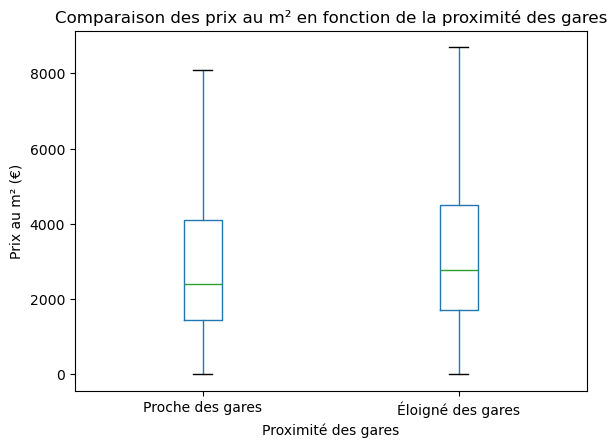

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_pv.boxplot(column="Prix_m2", by="Proche_gare", grid=False, showfliers=False)
plt.title("Comparaison des prix au m² en fonction de la proximité des gares")
plt.suptitle("")  # Supprimer le titre par défaut de boxplot
plt.xlabel("Proximité des gares")
plt.ylabel("Prix au m² (€)")
plt.xticks([1, 2], ["Proche des gares", "Éloigné des gares"])
plt.show()

## 3 - Corrélation entre les types de propriétés et les gares

In [68]:
# Distribution des types de propriétés proches et éloignées des gares
types_proche_gare = df_pv[df_pv["Proche_gare"]]["Type local"].value_counts(normalize=True)
types_loin_gare = df_pv[~df_pv["Proche_gare"]]["Type local"].value_counts(normalize=True)

# Combiner les distributions dans un DataFrame pour comparaison
distribution_types = pd.DataFrame({
    "Proche des gares": types_proche_gare,
    "Éloigné des gares": types_loin_gare
}).fillna(0)  # Remplir les NaN par 0 si un type est absent dans une catégorie

- Visualisation : Heatmap

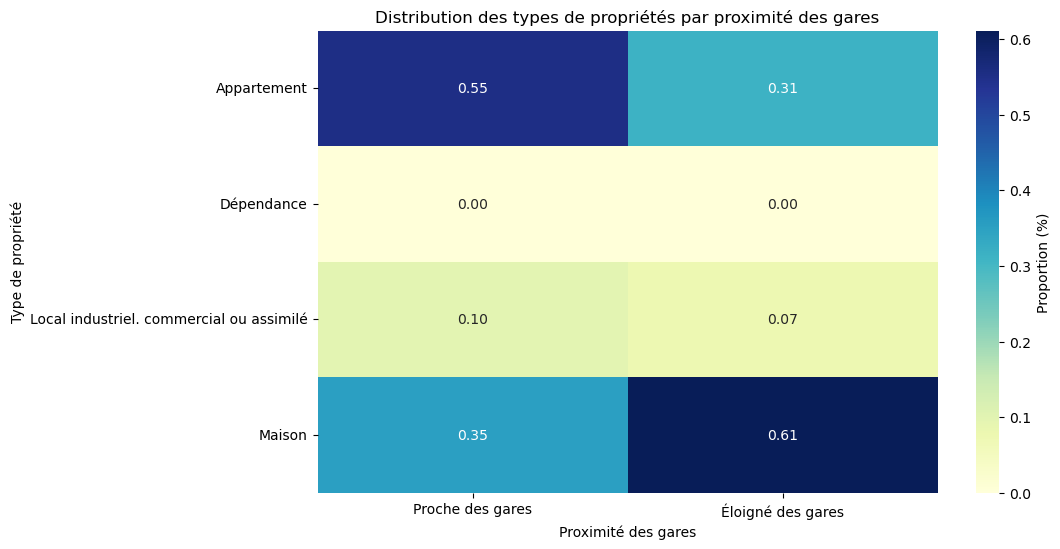

,Type local,Proche des gares,Éloigné des gares
0,Appartement,5.515854e-01,0.313930
1,Dépendance,3.965088e-07,0.000000
2,Local industriel. commercial ou assimilé,9.625727e-02,0.074869
3,Maison,3.521569e-01,0.611201


In [29]:
import seaborn as sns

# Réalisation de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(distribution_types, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Proportion (%)'})
plt.title("Distribution des types de propriétés par proximité des gares")
plt.xlabel("Proximité des gares")
plt.ylabel("Type de propriété")
plt.show()

# Afficher le DataFrame pour consultation
distribution_types.reset_index().rename(columns={"index": "Type de propriété"})

## 4 - Analyse de la dynamique des transactions dans les communes avec gares

In [30]:
# Extraire l'année des transactions
df_pv["Année"] = pd.to_datetime(df_pv["Date mutation"]).dt.year

# Comptage des transactions par année et proximité des gares
transactions_par_annee = df_pv.groupby(["Année", "Proche_gare"]).size().reset_index(name="Nombre de transactions")

# Préparer les données pour le chronogramme
transactions_pivot = transactions_par_annee.pivot(index="Année", columns="Proche_gare", values="Nombre de transactions")
transactions_pivot.columns = ["Éloigné des gares", "Proche des gares"]

- Visualisatio : Chronogramme

<Figure size 1200x600 with 0 Axes>

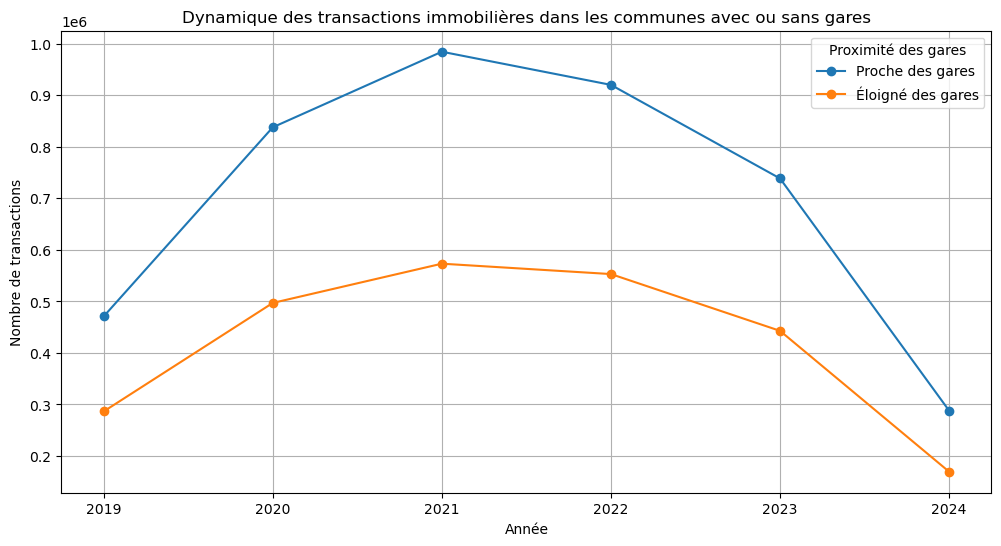

   Année  Proche_gare  Nombre de transactions
0   2019        False                  470835
1   2019         True                  286440
2   2020        False                  837819
3   2020         True                  497003
4   2021        False                  984473


In [ ]:
plt.figure(figsize=(12, 6))
transactions_pivot.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Dynamique des transactions immobilières dans les communes avec ou sans gares")
plt.xlabel("Année")
plt.ylabel("Nombre de transactions")
plt.legend(title="Proximité des gares", labels=["Proche des gares", "Éloigné des gares"])
plt.grid(True)
plt.show()

# Afficher les données préparées pour la chronologie
print(transactions_par_annee.head())

## 5 - Analyse du rendement locatif potentiel près des gares

- Calcul des rendements locatifs moyens

In [43]:
# Estimation des loyers moyens au m² par type de bien
loyer_m2_estimation = {
    "Appartement": 15,  # 15 €/m²
    "Maison": 10,       # 10 €/m²
    "Local industriel, commercial ou assimilé": 8,  # 8 €/m²
    "Dépendance": 5     # 5 €/m²
}

# Ajouter une colonne avec le loyer mensuel estimé
df_pv["Loyer mensuel estimé"] = df_pv.apply(
    lambda x: loyer_m2_estimation.get(x["Type local"], 0) * x["Surface reelle bati"] if x["Surface reelle bati"] > 0 else 0,
    axis=1
)

# Filtrer les lignes où la valeur foncière est > 0 pour éviter les divisions par zéro
df_pv = df_pv[df_pv["Valeur fonciere"] > 0]

# Calculer le rendement locatif (%)
df_pv["Rendement locatif (%)"] = (df_pv["Loyer mensuel estimé"] * 12 / df_pv["Valeur fonciere"]) * 100

# Calcul des rendements moyens par type de bien et proximité des gares
rendement_moyen = df_pv.groupby(["Proche_gare", "Type local"])["Rendement locatif (%)"].mean().reset_index()

<Figure size 2000x600 with 0 Axes>

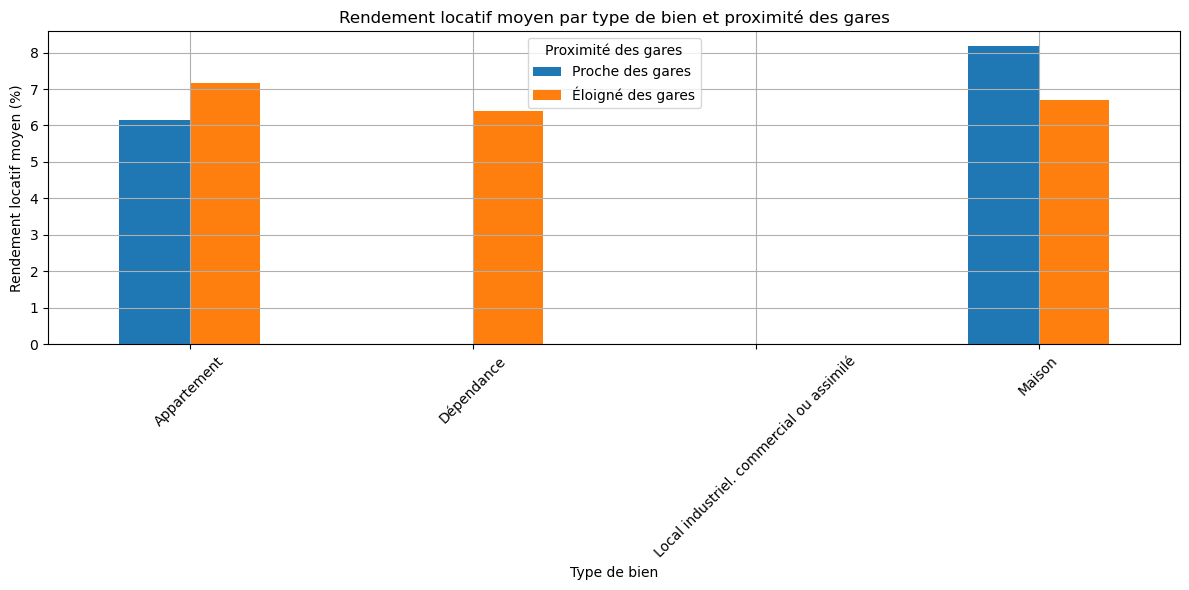

   Proche_gare                                Type local  \
0        False                               Appartement   
1        False  Local industriel. commercial ou assimilé   
2        False                                    Maison   
3         True                               Appartement   
4         True                                Dépendance   
5         True  Local industriel. commercial ou assimilé   
6         True                                    Maison   

   Rendement locatif (%)  
0               6.161127  
1               0.000000  
2               8.171955  
3               7.177716  
4               6.400000  
5               0.000000  
6               6.689169  


In [44]:
# Visualisation des rendements locatifs moyens
plt.figure(figsize=(20, 6))
rendement_pivot = rendement_moyen.pivot(index="Type local", columns="Proche_gare", values="Rendement locatif (%)")
rendement_pivot.columns = ["Éloigné des gares", "Proche des gares"]
rendement_pivot.plot(kind="bar", figsize=(12, 6), grid=True)

plt.title("Rendement locatif moyen par type de bien et proximité des gares")
plt.xlabel("Type de bien")
plt.ylabel("Rendement locatif moyen (%)")
plt.xticks(rotation=45)
plt.legend(title="Proximité des gares", labels=["Proche des gares", "Éloigné des gares"])
plt.tight_layout()
plt.show()

# Afficher les résultats calculés
print(rendement_moyen)

## 6 - Impact des gares sur l’évolution des prix au fil du temps


In [45]:
# Extraire l'année à partir des dates
df_pv["Année"] = pd.to_datetime(df_pv["Date mutation"]).dt.year

# Moyenne des valeurs foncières par année et proximité des gares
prix_annuel_par_proximite = df_pv.groupby(["Année", "Proche_gare"])["Valeur fonciere"].mean().reset_index()

# Renommer pour plus de clarté
prix_annuel_par_proximite["Proximité"] = prix_annuel_par_proximite["Proche_gare"].replace(
    {True: "Proche des gares", False: "Éloigné des gares"}
)
prix_annuel_par_proximite.drop(columns=["Proche_gare"], inplace=True)

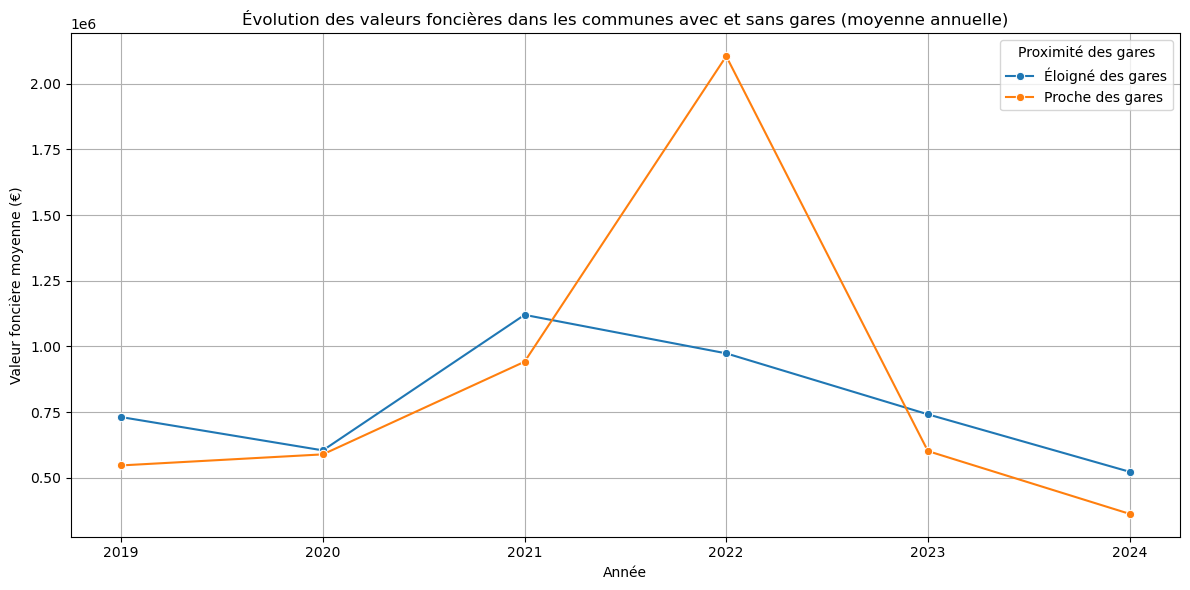

   Année  Valeur fonciere          Proximité
0   2019     7.313542e+05  Éloigné des gares
1   2019     5.475146e+05   Proche des gares
2   2020     6.047101e+05  Éloigné des gares
3   2020     5.895463e+05   Proche des gares
4   2021     1.120308e+06  Éloigné des gares


In [46]:
# Visualisation de la tendance
plt.figure(figsize=(12, 6))
sns.lineplot(data=prix_annuel_par_proximite, x="Année", y="Valeur fonciere", hue="Proximité", marker="o")
plt.title("Évolution des valeurs foncières dans les communes avec et sans gares (moyenne annuelle)")
plt.xlabel("Année")
plt.ylabel("Valeur foncière moyenne (€)")
plt.grid(True)
plt.legend(title="Proximité des gares")
plt.tight_layout()
plt.show()

# Afficher un aperçu des données traitées
print(prix_annuel_par_proximite.head())